In [1]:
#implementation of logistic regression

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("CHD dataset.csv")

In [6]:
df.head()

,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Obs     100 non-null    int64
 1   ID      100 non-null    int64
 2   AGE     100 non-null    int64
 3   agrp    100 non-null    int64
 4   CHD     100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


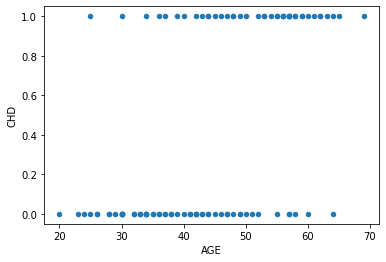

In [8]:
df.plot.scatter(x='AGE', y='CHD')

In [9]:
import statsmodels.api as sm

In [10]:
y= df['CHD']

In [11]:
X =sm.add_constant(df['AGE'])

In [12]:
logit_model = sm.Logit(y,X)

In [13]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6


In [14]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.214     
Dependent Variable: CHD              AIC:              111.3531  
Date:               2021-12-27 16:43 BIC:              116.5634  
No. Observations:   100              Log-Likelihood:   -53.677   
Df Model:           1                LL-Null:          -68.331   
Df Residuals:       98               LLR p-value:      6.1680e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -5.3095     1.1337   -4.6835   0.0000   -7.5314   -3.0875
AGE        0.1109     0.0241    4.6102   0.0000    0.0638    0.1581



In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn import metrics

In [17]:
LogReg = LogisticRegression()

In [18]:
LogReg.fit(X,y)

LogisticRegression()

In [19]:
y_pred = LogReg.predict(X)

In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X,y)))

Accuracy of logistic regression classifier on test set: 0.74


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix = confusion_matrix(y,y_pred)

In [23]:
print(confusion_matrix)

[[45 12]
 [14 29]]


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        57
           1       0.71      0.67      0.69        43

    accuracy                           0.74       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.74      0.74       100



In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y, LogReg.predict(X))
fpr, tpr ,thresholds = roc_curve(y, LogReg.predict_proba(X)[:,1])
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

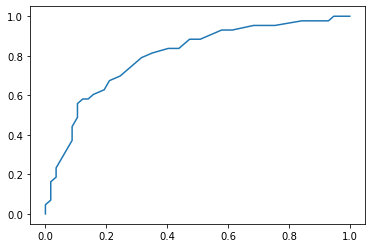

In [37]:
plt.plot(fpr,tpr,label ='Logistic Regression (area=%0.2f)'%logit_roc_auc)

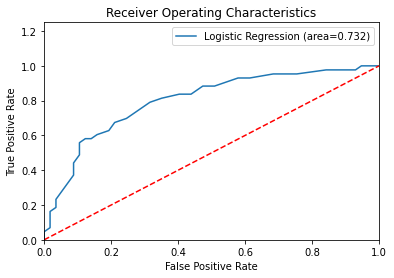

In [58]:
plt.plot(fpr,tpr,label ='Logistic Regression (area=%0.3f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.25])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="upper right")
plt.savefig('Log_ROC')
plt.show()